In [1]:
# Get dependencies
# https://github.com/cjhutto/vaderSentiment

!pip install --upgrade vaderSentiment



In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#loading the tokyo dataset
df = pd.read_csv("tokyo_2020_tweets.csv", on_bad_lines ='skip')

#I made this object analyzer to go through the rest of the code
analyzer = SentimentIntensityAnalyzer()


<ipython-input-2-39eaeee9740d>:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("tokyo_2020_tweets.csv", on_bad_lines ='skip')


In [3]:

#had some type issues so just using the fillna
df['text'] = df['text'].fillna("")



#applying vader to get the sentiment analysis scores
vaderScores = df['text'].apply(analyzer.polarity_scores)
vaderDFTokyo = pd.DataFrame(list(vaderScores)) #making new dataframe to store the results


print(vaderDFTokyo.head())

   neg    neu    pos  compound
0  0.0  0.597  0.403    0.4019
1  0.0  0.339  0.661    0.5994
2  0.0  0.677  0.323    0.8885
3  0.0  0.843  0.157    0.6249
4  0.0  1.000  0.000    0.0000


In [4]:
print(vaderDFTokyo[['compound']].head(10)) #just testing the the vader_df column

   compound
0    0.4019
1    0.5994
2    0.8885
3    0.6249
4    0.0000
5    0.0000
6    0.6925
7    0.4404
8    0.0000
9    0.8860


In [5]:
VaderTokyo = pd.concat([df, vaderDFTokyo], axis=1)
###print(df_vader.head())
###print("+++++++")
#This fucntion is necessary to run through each tweet and give it the score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
#new dataframe to store the results from earlier and the results from the previous function
VaderTokyo['vader_sentiment'] = VaderTokyo['compound'].apply(classify_sentiment)

#just to see each result
print(VaderTokyo[['text', 'compound', 'vader_sentiment']].head(10))

                                                text  compound vader_sentiment
0                    Let the party begin\n#Tokyo2020    0.4019        Positive
1  Congratulations #Tokyo2020 https://t.co/8OFKMs...    0.5994        Positive
2  Big Breaking Now \n\nTokyo Olympic Update \n\n...    0.8885        Positive
3  Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...    0.6249        Positive
4  All I can think of every time I watch the ring...    0.0000         Neutral
5  #Tokyo2020 #Olympics\n#MirabaiChanu\n#Weightli...    0.0000         Neutral
6  Can't help but cheer for them. Banda 6 goals i...    0.6925        Positive
7  @inquirerdotnet @ftjochoaINQ Caloy Yulo's 14.0...    0.4404        Positive
8  Q3 🇨🇦 1-4 🇩🇪\n\nGreen card for Canada's captai...    0.0000         Neutral
9  Hearty Congratulations to \nIndian Railways 🏋️...    0.8860        Positive


In [6]:



#finding the average score for each tweet
average_compound = VaderTokyo['compound'].mean()

#finding the overall sentiment for each will pass in average_compound
def classify_overall(score):
    if score >= 0.05:
        return 'Overall Positive'
    elif score <= -0.05:
        return 'Overall Negative'
    else:
        return 'Overall Neutral'

overall_sentiment = classify_overall(average_compound)

#finding the average score for each result
PosAvg = VaderTokyo['pos'].mean()
NeuAvg = VaderTokyo['neu'].mean()
NegAvg = VaderTokyo['neg'].mean()

#trying to see the results
print("Tokyo Olympics summary")
print(f"Average Compound Score: {average_compound:.4f}")
print(f"Overall Sentiment: {overall_sentiment}")
print(f"Average Positive Score: {PosAvg:.4f}")
print(f"Average Neutral Score:  {NeuAvg:.4f}")
print(f"Average Negative Score: {NeuAvg:.4f}")


Tokyo Olympics summary
Average Compound Score: 0.1443
Overall Sentiment: Overall Positive
Average Positive Score: 0.0818
Average Neutral Score:  0.4369
Average Negative Score: 0.4369


<ipython-input-7-249bd9ad7505>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


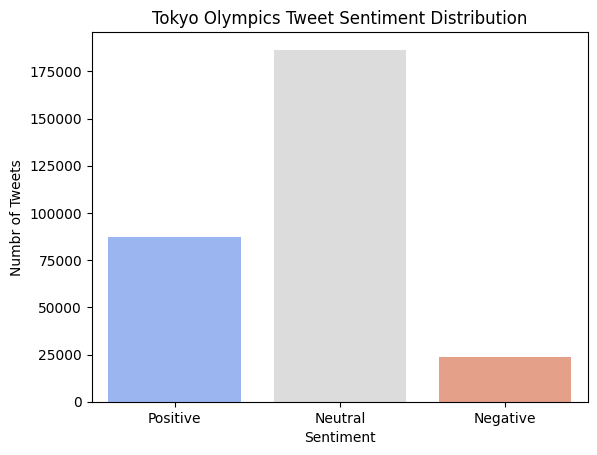

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#Here I am coutning the total for each each category
sentiment_counts = VaderTokyo['vader_sentiment'].value_counts().reindex(['Positive', 'Neutral', 'Negative'])

#visualzie the data by seeing the distirbution
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Tokyo Olympics Tweet Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Numbr of Tweets')
plt.show()


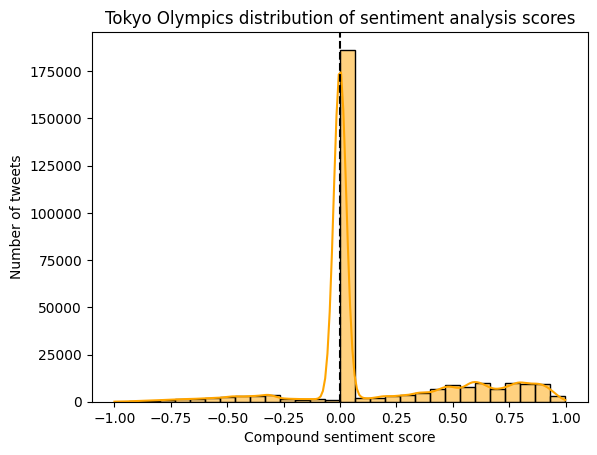

In [8]:
#making a histogram to see how often each score is present
sns.histplot(VaderTokyo['compound'], bins = 30, kde=True, color = 'orange')
plt.title('Tokyo Olympics distribution of sentiment analysis scores')
plt.xlabel('Compound sentiment score')
plt.ylabel('Number of tweets')
plt.axvline(0, color = 'black', linestyle='--')
plt.show()

In [9]:
#getting date from csv
VaderTokyo['date'] = pd.to_datetime(VaderTokyo['date'], errors='coerce')  # only needed if it's still a string

#grouping by data to find sentiment
daily_sentiment_tokyo = VaderTokyo.groupby('date')['compound'].mean().reset_index()

print(daily_sentiment_tokyo.head())

                 date  compound
0 2021-07-24 09:03:12  0.903500
1 2021-07-24 09:03:13  0.161067
2 2021-07-24 09:03:14  0.893400
3 2021-07-24 09:03:16  0.629500
4 2021-07-24 09:03:17  0.771600


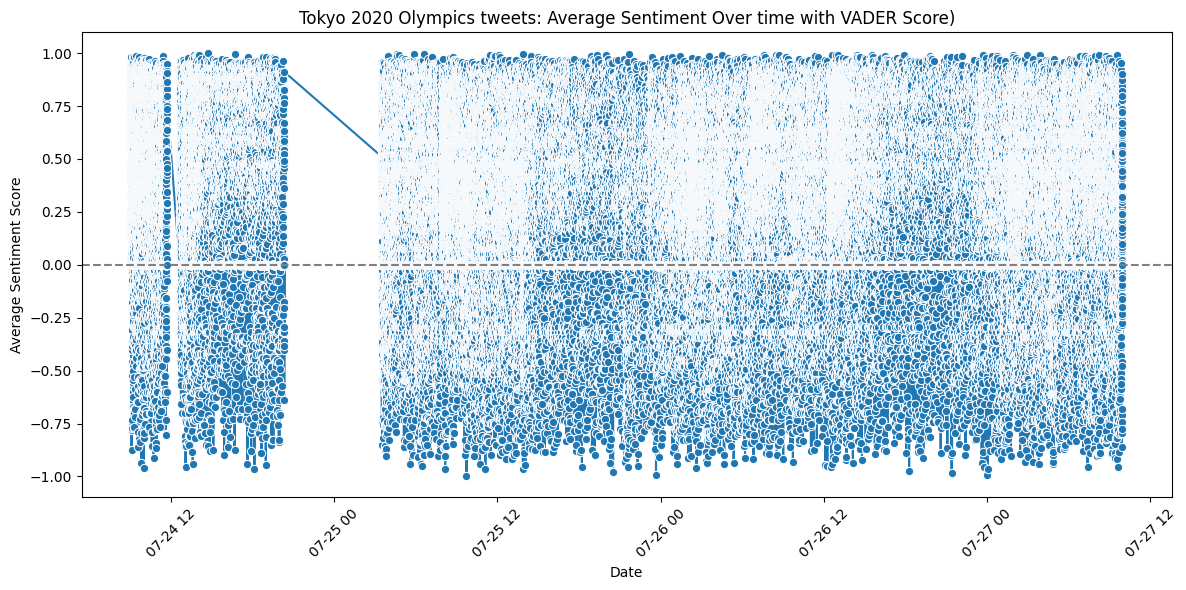

Note: all tweets are from 2021 and the number shows a 12 hour time interval


In [10]:
#plot
plt.figure(figsize = (12, 6))
sns.lineplot(data = daily_sentiment_tokyo, x = 'date', y='compound', marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Tokyo 2020 Olympics tweets: Average Sentiment Over time with VADER Score)')
plt.xlabel('Date') #note all tweets are from 2021
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Note: all tweets are from 2021 and the number shows a 12 hour time interval")
